In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4/PTDL/data_TV.csv')
df.head()

,first_air_date,origin_country,original_language,name,popularity,vote_average,vote_count,overview
0,2021-09-03,US,en,The D'Amelio Show,30.104,9.0,3071,From relative obscurity and a seemingly normal...
1,2008-01-20,US,en,Breaking Bad,468.253,8.8,10131,"When Walter White, a New Mexico chemistry teac..."
2,2021-11-06,US,en,Arcane,95.667,8.7,2615,Amid the stark discord of twin cities Piltover...
3,2013-12-02,US,en,Rick and Morty,1511.996,8.7,7220,Rick is a mentally-unbalanced but scientifical...
4,2022-04-14,US,en,The Kardashians,195.038,8.7,1627,The family you know and love is here with a br...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_air_date     2611 non-null   object 
 1   origin_country     2617 non-null   object 
 2   original_language  2617 non-null   object 
 3   name               2617 non-null   object 
 4   popularity         2617 non-null   float64
 5   vote_average       2617 non-null   float64
 6   vote_count         2617 non-null   int64  
 7   overview           2552 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 163.7+ KB


In [30]:
df['first_air_date']=pd.to_datetime(df['first_air_date'],format = "%Y-%m-%d")

In [31]:
df=df[['overview','name','vote_average','popularity','vote_count']]

In [32]:
df.head()

,overview,name,vote_average,popularity,vote_count
0,From relative obscurity and a seemingly normal...,The D'Amelio Show,9.0,30.104,3071
1,"When Walter White, a New Mexico chemistry teac...",Breaking Bad,8.8,468.253,10131
2,Amid the stark discord of twin cities Piltover...,Arcane,8.7,95.667,2615
3,Rick is a mentally-unbalanced but scientifical...,Rick and Morty,8.7,1511.996,7220
4,The family you know and love is here with a br...,The Kardashians,8.7,195.038,1627


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   overview      2552 non-null   object 
 1   name          2617 non-null   object 
 2   vote_average  2617 non-null   float64
 3   popularity    2617 non-null   float64
 4   vote_count    2617 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 102.4+ KB


In [34]:
df.describe()

,vote_average,popularity,vote_count
count,2617.000000,2617.000000,2617.000000
mean,7.692434,59.805976,604.823462
std,0.617770,222.409084,1223.234489
min,0.600000,0.866000,99.000000
25%,7.300000,16.567000,150.000000
50%,7.700000,27.489000,257.000000
75%,8.100000,49.765000,569.000000
max,9.000000,6684.611000,19459.000000


* Lưu lượng người xem trung bình là khoảng 6000 ; trung bình cộng Số điểm đánh giá trung bình là 7,7 và trung bình số lượt vote của các bộ phim tầm khoảng 600
* Lưu lượng người xem tối đa đạt tới gần 6,7 triệu lượt xem
* Điểm đánh giá trung bình thấp nhất là 0.6 với cao nhất tới 9.0
* Số lượt đánh giá của phim thấp nhất là 99 lượt và cao nhất lên tới 19459 lượt

In [35]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('stopwords')

stop=set(stopwords.words('english'))

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
print(len(df.name.unique()),len(df))

2560 2617


In [37]:
df=df[df['popularity']>800].reset_index()

In [38]:
df=df[df['vote_average']>=5].reset_index()

In [39]:
len(df.name.unique())

11

In [40]:
for index,text in enumerate(df['overview'][:5]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 Rick is a mentally-unbalanced but scientifically gifted old man who has recently reconnected with his family. He spends most of his time involving his young grandson Morty in dangerous, outlandish adventures throughout space and alternate universes. Compounded with Morty's already unstable family life, these events cause Morty much distress at home and school.
Review 2:
 The Targaryen dynasty is at the absolute apex of its power, with more than 15 dragons under their yoke. Most empires crumble from such heights. In the case of the Targaryens, their slow fall begins when King Viserys breaks with a century of tradition by naming his daughter Rhaenyra heir to the Iron Throne. But when Viserys later fathers a son, the court is shocked when Rhaenyra retains her status as his heir, and seeds of division sow friction across the realm.
Review 3:
 Bored and unhappy as the Lord of Hell, Lucifer Morningstar abandoned his throne and retired to Los Angeles, where he has teamed up with LA

In [41]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [42]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)


In [43]:
df['overview']=df['overview'].apply(lambda x:expand_contractions(x))
df['cleaned']=df['overview'].apply(lambda x: x.lower())
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [44]:
for index,text in enumerate(df['cleaned'][:5]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 rick is a mentallyunbalanced but scientifically gifted old man who has recently reconnected with his family he spends most of his time involving his young grandson morty in dangerous outlandish adventures throughout space and alternate universes compounded with morty is already unstable family life these events cause morty much distress at home and school
Review 2:
 the targaryen dynasty is at the absolute apex of its power with more than dragons under their yoke most empires crumble from such heights in the case of the targaryens their slow fall begins when king viserys breaks with a century of tradition by naming his daughter rhaenyra heir to the iron throne but when viserys later fathers a son the court is shocked when rhaenyra retains her status as his heir and seeds of division sow friction across the realm
Review 3:
 bored and unhappy as the lord of hell lucifer morningstar abandoned his throne and retired to los angeles where he has teamed up with lapd detective chloe

In [45]:
df['cleaned'][0]

'rick is a mentallyunbalanced but scientifically gifted old man who has recently reconnected with his family he spends most of his time involving his young grandson morty in dangerous outlandish adventures throughout space and alternate universes compounded with morty is already unstable family life these events cause morty much distress at home and school'

In [46]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [47]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
American Horror Story,anthology horror drama series center different...
Chucky,vintage chucky doll turn suburban yard sale id...
Dahmer – Monster: The Jeffrey Dahmer Story,decade teen boy young man murder convict kille...
Game of Thrones,seven noble family fight control mythical land...
Grey's Anatomy,follow personal professional life group doctor...


In [48]:
df_cleaned = df.copy()

# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word',stop_words='english')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,abandon,absolute,adventure,ally,alternate,american,amidst,ancient,angeles,anthology,...,war,watch,way,westeros,witch,world,yard,yoke,young,zombie
name,,,,,,,,,,,,,,,,,,,,,
American Horror Story,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Chucky,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Dahmer – Monster: The Jeffrey Dahmer Story,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df_cleaned.head()

,level_0,index,overview,name,vote_average,popularity,vote_count,cleaned,lemmatized
0,0,3,Rick is a mentally-unbalanced but scientifical...,Rick and Morty,8.7,1511.996,7220,rick is a mentallyunbalanced but scientificall...,rick mentallyunbalanced scientifically gifted ...
1,1,179,The Targaryen dynasty is at the absolute apex ...,House of the Dragon,8.5,6684.611,1816,the targaryen dynasty is at the absolute apex ...,targaryen dynasty absolute apex power dragon y...
2,2,200,"Bored and unhappy as the Lord of Hell, Lucifer...",Lucifer,8.5,838.264,12599,bored and unhappy as the lord of hell lucifer ...,bored unhappy lord hell lucifer morningstar ab...
3,3,276,Seven noble families fight for control of the ...,Game of Thrones,8.4,1063.455,19459,seven noble families fight for control of the ...,seven noble family fight control mythical land...
4,4,421,"Across more than a decade, 17 teen boys and yo...",Dahmer – Monster: The Jeffrey Dahmer Story,8.3,5865.900,973,across more than a decade teen boys and young ...,decade teen boy young man murder convict kille...


In [52]:
import nltk
nltk.download('punkt')
df_cleaned['cleaned_token'] = df_cleaned.apply(lambda x: tokenize(x['lemmatized']), axis=1)
df_cleaned.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,level_0,index,overview,name,vote_average,popularity,vote_count,cleaned,lemmatized,cleaned_token
0,0,3,Rick is a mentally-unbalanced but scientifical...,Rick and Morty,8.7,1511.996,7220,rick is a mentallyunbalanced but scientificall...,rick mentallyunbalanced scientifically gifted ...,"[rick, mentallyunbalanced, scientifically, gif..."
1,1,179,The Targaryen dynasty is at the absolute apex ...,House of the Dragon,8.5,6684.611,1816,the targaryen dynasty is at the absolute apex ...,targaryen dynasty absolute apex power dragon y...,"[targaryen, dynasty, absolute, apex, power, dr..."
2,2,200,"Bored and unhappy as the Lord of Hell, Lucifer...",Lucifer,8.5,838.264,12599,bored and unhappy as the lord of hell lucifer ...,bored unhappy lord hell lucifer morningstar ab...,"[bored, unhappy, lord, hell, lucifer, mornings..."
3,3,276,Seven noble families fight for control of the ...,Game of Thrones,8.4,1063.455,19459,seven noble families fight for control of the ...,seven noble family fight control mythical land...,"[seven, noble, family, fight, control, mythica..."
4,4,421,"Across more than a decade, 17 teen boys and yo...",Dahmer – Monster: The Jeffrey Dahmer Story,8.3,5865.900,973,across more than a decade teen boys and young ...,decade teen boy young man murder convict kille...,"[decade, teen, boy, young, man, murder, convic..."


In [53]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str


In [54]:
df_cleaned['cleaned_token'] = df_cleaned['cleaned_token'].apply(lambda x: extract_ngrams(x,1))
df_cleaned.head()

,level_0,index,overview,name,vote_average,popularity,vote_count,cleaned,lemmatized,cleaned_token
0,0,3,Rick is a mentally-unbalanced but scientifical...,Rick and Morty,8.7,1511.996,7220,rick is a mentallyunbalanced but scientificall...,rick mentallyunbalanced scientifically gifted ...,"[rick, mentallyunbalanced, scientifically, gif..."
1,1,179,The Targaryen dynasty is at the absolute apex ...,House of the Dragon,8.5,6684.611,1816,the targaryen dynasty is at the absolute apex ...,targaryen dynasty absolute apex power dragon y...,"[targaryen, dynasty, absolute, apex, power, dr..."
2,2,200,"Bored and unhappy as the Lord of Hell, Lucifer...",Lucifer,8.5,838.264,12599,bored and unhappy as the lord of hell lucifer ...,bored unhappy lord hell lucifer morningstar ab...,"[bored, unhappy, lord, hell, lucifer, mornings..."
3,3,276,Seven noble families fight for control of the ...,Game of Thrones,8.4,1063.455,19459,seven noble families fight for control of the ...,seven noble family fight control mythical land...,"[seven, noble, family, fight, control, mythica..."
4,4,421,"Across more than a decade, 17 teen boys and yo...",Dahmer – Monster: The Jeffrey Dahmer Story,8.3,5865.900,973,across more than a decade teen boys and young ...,decade teen boy young man murder convict kille...,"[decade, teen, boy, young, man, murder, convic..."


In [55]:
def combine_words(word_list):
    all_words = []
    for word in word_list: all_words += word
    return all_words

def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending =False)
    word_count_sorted
    return word_count_sorted[:10]

In [56]:
reviews = df_cleaned['cleaned_token']
reviews_words = combine_words(reviews)
reviews_words[:10]

['rick',
 'mentallyunbalanced',
 'scientifically',
 'gifted',
 'old',
 'man',
 'recently',
 'reconnecte',
 'family',
 'spend']

In [57]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.tail()

,words,word_count
42,begin,3
5,man,3
145,past,2
44,viserys,2
50,rhaenyra,2


<Axes: xlabel='words', ylabel='word_count'>

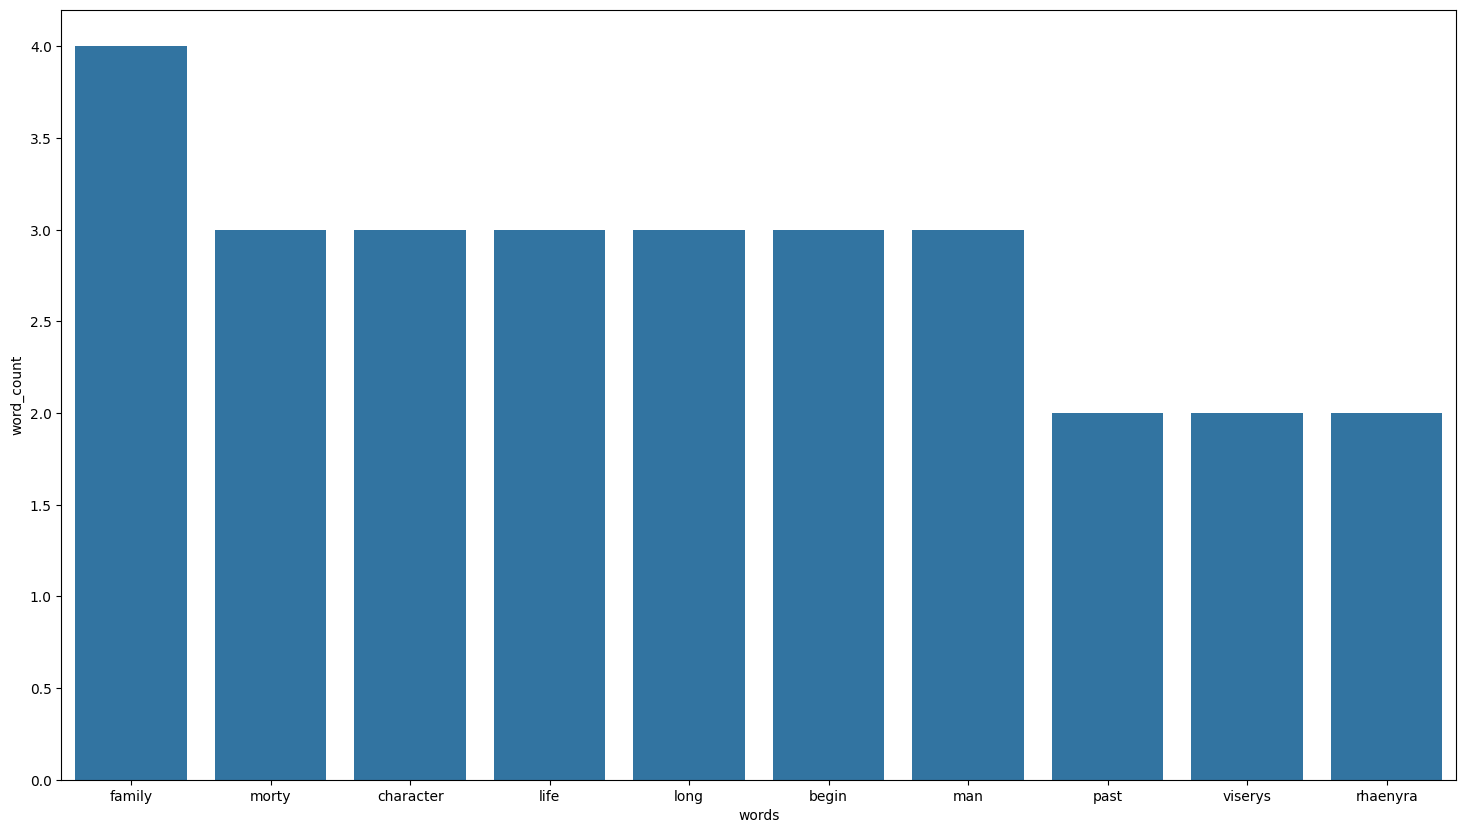

In [58]:
import seaborn as sns
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

In [59]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

Output hidden; open in https://colab.research.google.com to view.

In [60]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [61]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['overview']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 Beginning in a time of relative peace, we follow an ensemble cast of characters as they confront the re-emergence of evil to Middle-earth. From the darkest depths of the Misty Mountains, to the majestic forests of Lindon, to the breathtaking island kingdom of Númenor, to the furthest reaches of the map, these kingdoms and characters will carve out legacies that live on long after they are gone.
Review 2:
 Follows the personal and professional lives of a group of doctors at Seattle’s Grey Sloan Memorial Hospital.
Review 3:
 Rick is a mentally-unbalanced but scientifically gifted old man who has recently reconnected with his family. He spends most of his time involving his young grandson Morty in dangerous, outlandish adventures throughout space and alternate universes. Compounded with Morty is already unstable family life, these events cause Morty much distress at home and school.


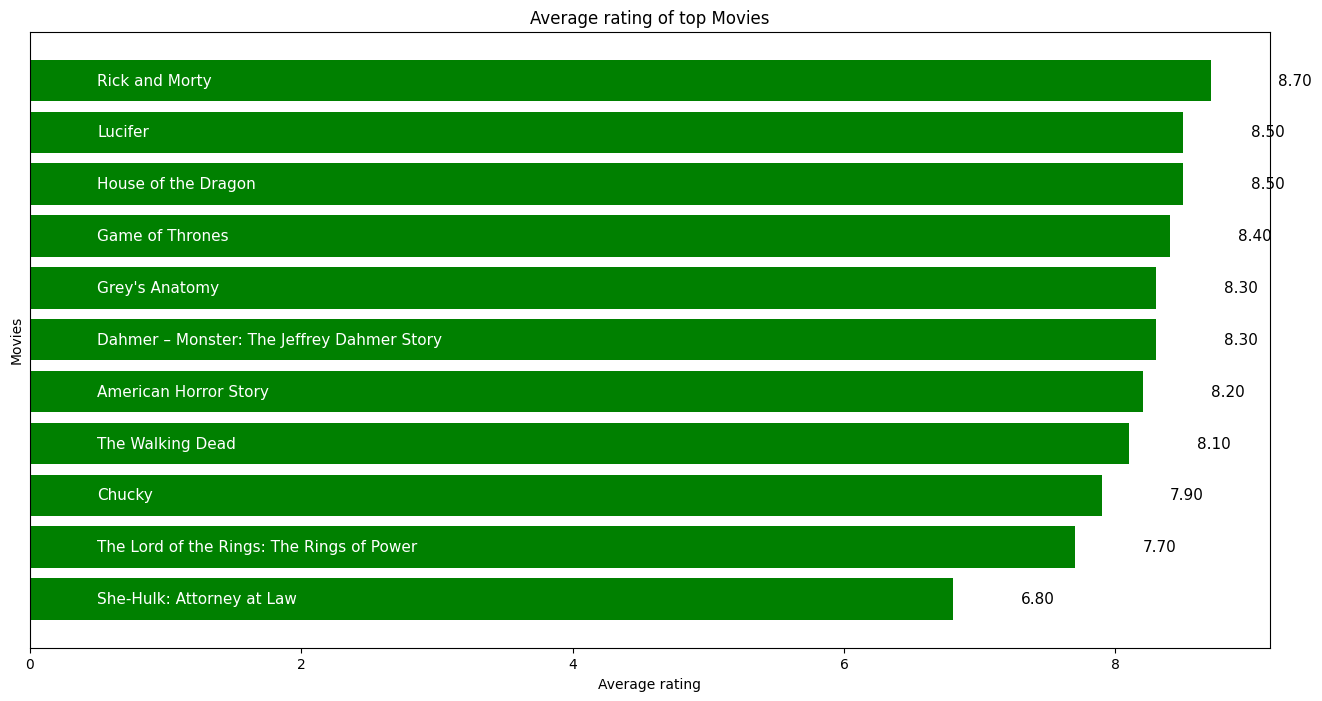

In [62]:
good_percentage=pd.DataFrame(((df.groupby('name')['vote_average'].sum())/df.groupby('name')['vote_average'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Average rating')
plt.ylabel('Movies')
plt.title('Average rating of top Movies')
recommend_graph=plt.barh(np.arange(len(good_percentage.index)),good_percentage['vote_average'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,good_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,good_percentage['vote_average']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

## Kết luận:
* Thông qua trực quan hóa dữ liệu, ta thấy các bộ phim có số lượt xem cao nhất đa phần là sẽ có vote_average cao
* Thông qua wordcloud, ta thấy được thể loại phim được ưa chuộng bởi người xem là Sci-fi(khoa học viễn tưởng) và Horror(kinh dị).